In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze topic modeling results for a subcategory

In [32]:
# filepath = '../data/bertopic_kmeans_body_lotion.csv'
filepath = '../data/lsa_wipes_lotion_airfreshener_spraycleaners_haircare.csv' 
# filepath = '../data/lsa_air_freshener.csv'
subcat = 'AIR FRESHENER'
model = 'lsa'
df = pd.read_csv(filepath)
df = df.dropna()
df.shape

(60308, 14)

In [33]:
def get_topic_information(df, subcategory):
        subset_df = df[df['subcategory'] == subcategory]
        topic_similarity_df = subset_df.groupby(['star_rating', f'{model}_topic_label'])[f'{model}_similarity_score'].mean().reset_index()
        topic_similarity_df['count'] = subset_df.groupby(['star_rating', f'{model}_topic_label'])[f'{model}_similarity_score'].count().values
        return topic_similarity_df

In [34]:
topic_info = get_topic_information(df, subcat)
topic_info.loc[:, 'topic_id'] = np.arange(0, topic_info.shape[0])
pd.set_option('display.max_colwidth', None)
topic_info

,star_rating,lsa_topic_label,lsa_similarity_score,count,topic_id
0,1.0,Broken or missing items and failed delivery,0.297880,132,0
1,1.0,"Product doesn't work, smells badly, and wastes money.",0.351762,667,1
2,1.0,Waste money on faulty or non-working items and bottle sprays,0.327299,127,2
3,2.0,"Strong fragrance can be overpowering, especially on low setting",0.536674,38,3
4,2.0,Strong scent does not work well in product,0.422865,255,4
5,2.0,Week or month-old products may not work due to poor battery or plug issues.,0.244021,69,5
6,3.0,Ok strong scent with some imperfections,0.503050,43,6
7,3.0,Performs oddly and lacks expected strength with inconsistent scent,0.226656,29,7
8,3.0,Strong but doesn't last fragrance.,0.340197,511,8
9,4.0,"Fresh, nice, and great scent in room and house",0.378360,1088,9


In [35]:
# overall average similarity score
overall_avg = df.groupby(['star_rating'])[f'{model}_similarity_score'].mean().reset_index()
overall_avg

,star_rating,lsa_similarity_score
0,1.0,0.362406
1,2.0,0.385265
2,3.0,0.419063
3,4.0,0.464904
4,5.0,0.407498


In [36]:
df[f'{model}_similarity_score'].describe()

count    60308.000000
mean         0.410386
std          0.160377
min         -0.135860
25%          0.305757
50%          0.425376
75%          0.524234
max          0.893410
Name: lsa_similarity_score, dtype: float64

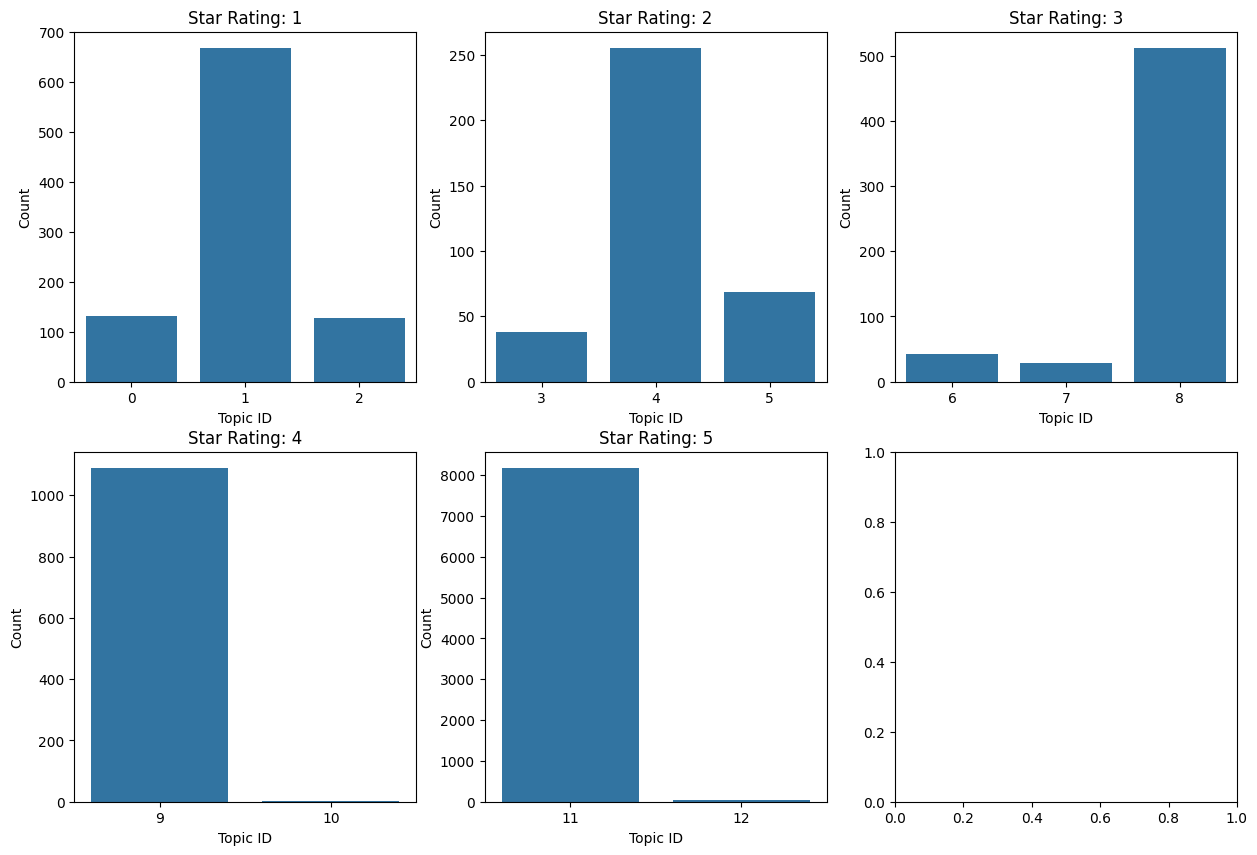

In [37]:
# plot count of reviews per topic, use subplots to separate by star rating
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < 5:
        topic_info_star = topic_info[topic_info['star_rating'] == i+1]
        sns.barplot(x=f'topic_id', y='count', data=topic_info_star, ax=ax)
        ax.set_title(f'Star Rating: {i+1}')
        ax.set_xlabel('Topic ID')
        ax.set_ylabel('Count')

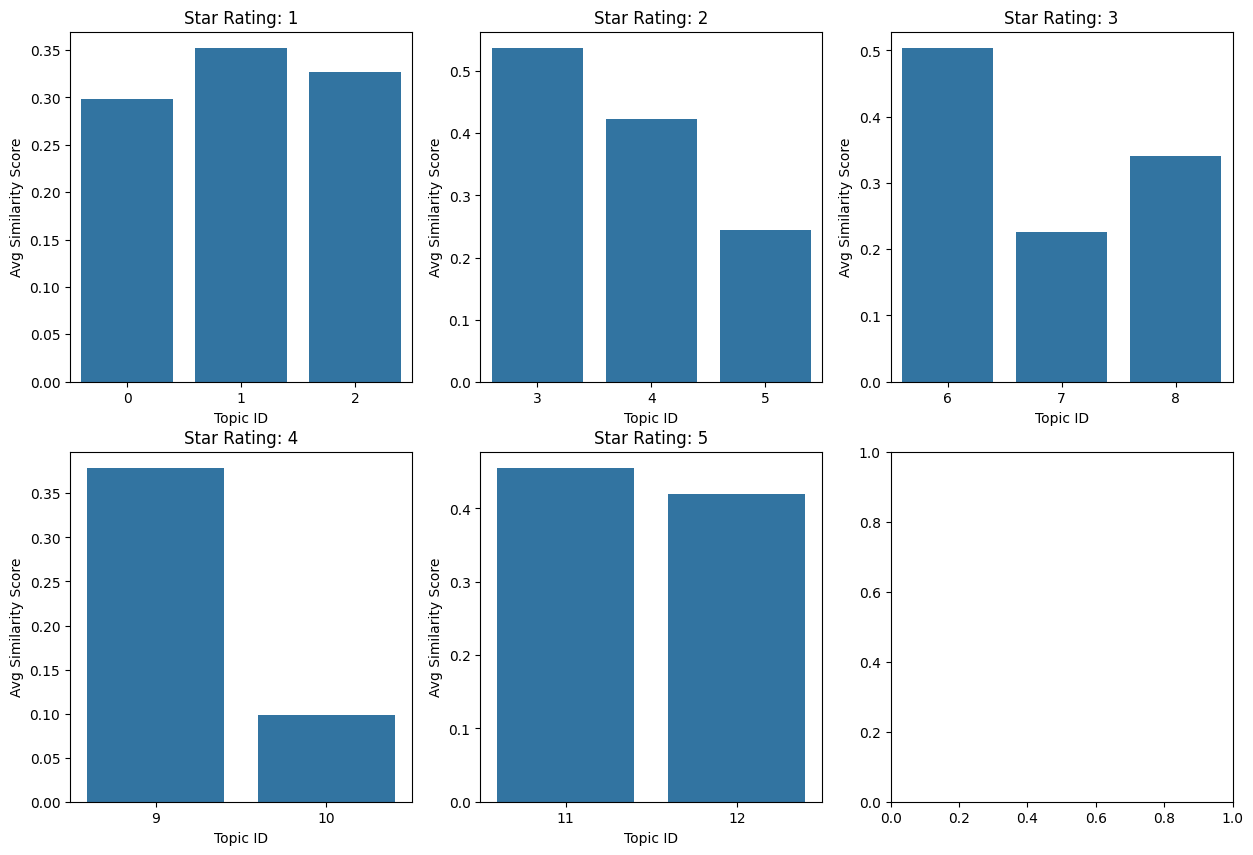

In [38]:
# plot avg similarity scores of each topic, use subplots to separate by star rating
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < 5:
        topic_info_star = topic_info[topic_info['star_rating'] == i+1]
        sns.barplot(x=f'topic_id', y=f'{model}_similarity_score', data=topic_info_star, ax=ax)
        ax.set_title(f'Star Rating: {i+1}')
        ax.set_xlabel('Topic ID')
        ax.set_ylabel('Avg Similarity Score')

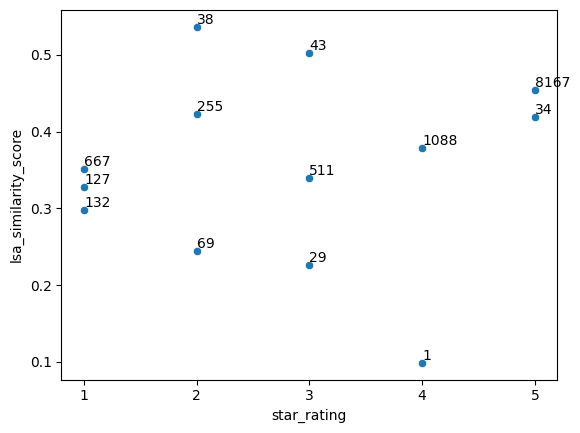

In [39]:
sns.scatterplot(x='star_rating', y=f'{model}_similarity_score', data=topic_info)
# label each dot with count of reviews in that topic
for i, label in enumerate(topic_info['count']):
    plt.text(topic_info['star_rating'][i], topic_info[f'{model}_similarity_score'][i], label, fontsize=10, va='bottom')
plt.xticks(np.arange(1, 6))
plt.show()

In [40]:
low_score_topics = topic_info[topic_info[f'{model}_similarity_score'] < 0.35]
low_score_topics

,star_rating,lsa_topic_label,lsa_similarity_score,count,topic_id
0,1.0,Broken or missing items and failed delivery,0.297880,132,0
2,1.0,Waste money on faulty or non-working items and bottle sprays,0.327299,127,2
5,2.0,Week or month-old products may not work due to poor battery or plug issues.,0.244021,69,5
7,3.0,Performs oddly and lacks expected strength with inconsistent scent,0.226656,29,7
8,3.0,Strong but doesn't last fragrance.,0.340197,511,8
10,4.0,"Smell fresh and long-lasting, pleasing even great.",0.098874,1,10


In [41]:
# look at reviews with low score topics for each topic in low_score_topics
pd.set_option('display.max_colwidth', None)
topics = low_score_topics[f'{model}_topic_label'].values
similar_reviews = df[df[f'{model}_topic_label'].isin([topics[3]]) & (df[f'{model}_similarity_score'])]
similar_reviews[['review_text', f'{model}_topic_words',f'{model}_topic_label', f'{model}_similarity_score']].sort_values(f'{model}_similarity_score', ascending=False)

,review_text,lsa_topic_words,lsa_topic_label,lsa_similarity_score
79987,fragrance doesnt last long,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long",Performs oddly and lacks expected strength with inconsistent scent,0.488798
25356,scent seem to fade after about 10 day and this thing be empty in 12 the oil doesnt last long enough value for the amount be great but they need to be change 15 day or less performancenot great installationeasy just plug in leakno leak scentbeautiful,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long",Performs oddly and lacks expected strength with inconsistent scent,0.470933
11706,i love the smell however it isnt very strong and doesnt last long,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long",Performs oddly and lacks expected strength with inconsistent scent,0.425656
119582,fragrance be short last needs replacement in 30 day or less,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long",Performs oddly and lacks expected strength with inconsistent scent,0.378894
45926,not that thrill with them or maybe just the fragrance doesnt last as long as say,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long",Performs oddly and lacks expected strength with inconsistent scent,0.375967
158949,they smell great but never last as long as advertised,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long",Performs oddly and lacks expected strength with inconsistent scent,0.375534
8561,these be ok but i notice the hawaiian scent isnt as strong or long lasting as the gain scent,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long",Performs oddly and lacks expected strength with inconsistent scent,0.367297
29970,do not last as advertised,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long",Performs oddly and lacks expected strength with inconsistent scent,0.347371
111607,love how my apartment smelt with these very clean but they dont last long enough,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long",Performs oddly and lacks expected strength with inconsistent scent,0.328465
153453,im disappoint these fragrant dispenser do not last as long as described,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long",Performs oddly and lacks expected strength with inconsistent scent,0.314676


In [42]:
# look at topic words for each topic and star rating
subset_df = df[df['subcategory'] == subcat]
topic_words = subset_df.groupby(['star_rating', f'{model}_topic_label'])[f'{model}_topic_words'].first().reset_index()
topic_words

,star_rating,lsa_topic_label,lsa_topic_words
0,1.0,Broken or missing items and failed delivery,"broken, air, break, miss, receive order, refund, item receive, receive package, package, didnt, didnt receive, order, receive item, item, receive"
1,1.0,"Product doesn't work, smells badly, and wastes money.","just, waste money, product, waste, money, use, dont, buy, doesnt, spray, smell like, scent, work, like, smell"
2,1.0,Waste money on faulty or non-working items and bottle sprays,"didnt work, bottle, doesnt, item, receive, battery, doesnt work, waste money, waste, stop work, buy, money, stop, spray, work"
3,2.0,"Strong fragrance can be overpowering, especially on low setting","fragrance strong, need, strong need, scent overpower, overwhelming, fragrance, scent overwhelming, low setting, overpower, setting, low, scent strong, strong scent, scent, strong"
4,2.0,Strong scent does not work well in product,"long, product, spray, just, doesnt, good, dont, use, buy, strong, smell like, work, like, scent, smell"
5,2.0,Week or month-old products may not work due to poor battery or plug issues.,"week, half, product, air, doesnt, month, plug, doesnt work, come, battery, refill, buy, stop work, stop, work"
6,3.0,Ok strong scent with some imperfections,"scent little, ok, plug, strong scent, product, day scent, didnt, gain, expect, day, strong expect, like, scent strong, scent, strong"
7,3.0,Performs oddly and lacks expected strength with inconsistent scent,"strong expect, isnt strong, fragrance doesnt, smell great, long advertised, advertised, day, great, scent, dont long, doesnt, scent strong, doesnt long, strong, long"
8,3.0,Strong but doesn't last fragrance.,"smell like, use, love, doesnt long, dont, product, spray, smell good, strong, doesnt, good, long, like, scent, smell"
9,4.0,"Fresh, nice, and great scent in room and house","fresh, nice, room, smell great, spray, house, product, love, use, like, long, good, great, scent, smell"
